In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
import numpy as np

In [3]:
(X_train,_),(X_test,_) = mnist.load_data()

In [4]:
# Noramlizing between -0.5 and 0.5
X_train = X_train.astype('float32')/255 - 0.5
X_test = X_test.astype('float32')/255 - 0.5

In [5]:
X_train = X_train
X_test = X_test

In [6]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Reshape, Flatten

In [7]:
img_shape = X_train[0].shape

In [8]:
encoding_dim = 32

In [23]:
encoder = Sequential()
encoder.add(Input(img_shape))
encoder.add(Flatten())
encoder.add(Dense(128))
encoder.add(Dense(64))
encoder.add(Dense(encoding_dim))

In [52]:
decoder = Sequential()
decoder.add(Input(encoding_dim))
decoder.add(Dense(64))
decoder.add(Dense(128))
decoder.add(Dense(np.prod(img_shape)))
decoder.add(Reshape(img_shape))

In [53]:
# autoencoder = Sequential()
# autoencoder.add(Input(img_shape))
# autoencoder.add(Flatten())
# autoencoder.add(Dense(128))
# autoencoder.add(Dense(64))
# autoencoder.add(Dense(encoding_dim))
# autoencoder.add(Dense(64))
# autoencoder.add(Dense(128))
# autoencoder.add(Dense(np.prod(img_shape)))
# autoencoder.add(Reshape(img_shape))

In [54]:
input_ = Input(img_shape)

In [55]:
# Using Latent to get the output
bottleneck = encoder(input_)
reconstruction = decoder(bottleneck)

In [56]:
#this is the input and output
autoencoder = Model(input_,reconstruction)

In [90]:
autoencoder.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [91]:
# Lets keep model checkpoints and callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [92]:
checkpoints = ModelCheckpoint(
    filepath='model.h5',
    verbose=1,
    save_best_only=True #Best Model is saved on longer training
)
checkpoints

In [93]:
tb = TensorBoard(
    log_dir="./logs",
    write_graph=True
)
tb

In [95]:
#Since we are reconstructing the same image the X and the Y are the same
history = autoencoder.fit(
    X_train,
    X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test,X_test),
    verbose=1,
    callbacks=[checkpoints, tb]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
58624/60000 [============================>.] - ETA: 0s - loss: -158.7267 - accuracy: 0.0420
Epoch 00001: val_loss improved from -157.51131 to -158.63781, saving model to model.h5
60000/60000 [==============================] - 3s 43us/sample - loss: -158.7303 - accuracy: 0.0418 - val_loss: -158.6378 - val_accuracy: 0.0368
Epoch 2/50
59136/60000 [============================>.] - ETA: 0s - loss: -159.4033 - accuracy: 0.0416
Epoch 00002: val_loss improved from -158.63781 to -159.10918, saving model to model.h5
60000/60000 [==============================] - 3s 42us/sample - loss: -159.4264 - accuracy: 0.0416 - val_loss: -159.1092 - val_accuracy: 0.0418
Epoch 3/50
59648/60000 [============================>.] - ETA: 0s - loss: -160.2138 - accuracy: 0.0417
Epoch 00003: val_loss improved from -159.10918 to -159.89142, saving model to model.h5
60000/60000 [==============================] - 3s 44us/sample - loss: -160.2198 - accuracy: 

Epoch 26/50
59136/60000 [============================>.] - ETA: 0s - loss: -163.5778 - accuracy: 0.0394
Epoch 00026: val_loss improved from -162.81409 to -163.02685, saving model to model.h5
60000/60000 [==============================] - 3s 58us/sample - loss: -163.5797 - accuracy: 0.0394 - val_loss: -163.0269 - val_accuracy: 0.0399
Epoch 27/50
59904/60000 [============================>.] - ETA: 0s - loss: -163.6663 - accuracy: 0.0389
Epoch 00027: val_loss improved from -163.02685 to -163.02698, saving model to model.h5
60000/60000 [==============================] - 4s 61us/sample - loss: -163.6686 - accuracy: 0.0389 - val_loss: -163.0270 - val_accuracy: 0.0399
Epoch 28/50
59136/60000 [============================>.] - ETA: 0s - loss: -163.6580 - accuracy: 0.0389
Epoch 00028: val_loss improved from -163.02698 to -163.02726, saving model to model.h5
60000/60000 [==============================] - 4s 65us/sample - loss: -163.6689 - accuracy: 0.0389 - val_loss: -163.0273 - val_accuracy: 0.

In [78]:
import matplotlib.pyplot as plt

In [79]:
def show(x):
    plt.imshow(np.clip(x+0.5,0,1))

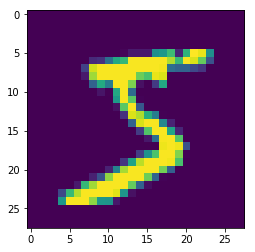

In [80]:
show(X_train[0])

In [81]:
#expects batch size show like 1*28*28 but we have not give a batch size so, we add none
autoencoder.predict(X_test[None][0])

array([[[-3.5226586e-01, -6.9608498e-01, -4.0988556e-01, ...,
         -6.6255838e-01,  1.2104005e+00, -7.9353154e-01],
        [-3.2852981e-02, -5.9844536e-01, -3.3117175e-01, ...,
         -3.7087509e-01,  1.3390608e-01, -4.5836478e-02],
        [-4.3824795e-01, -8.3215189e-01, -7.9897779e-01, ...,
         -5.7799572e-01,  9.9481009e-03, -3.8958997e-01],
        ...,
        [-4.2421168e-01, -7.4576765e-01, -8.0327255e-01, ...,
         -5.3277004e-01, -6.4318085e-01, -2.5627756e-01],
        [-7.0811224e-01, -8.0120790e-01, -6.6705656e-01, ...,
          2.3885901e+00, -1.1674107e+00, -3.8806918e-01],
        [-4.9027616e-01, -6.4072526e-01, -1.3157170e-01, ...,
         -7.3045814e-01, -4.4633675e-01, -8.1334329e-01]],

       [[-5.4615635e-01, -2.0662978e-01, -2.9893771e-01, ...,
         -5.5581862e-01, -1.2995864e+01, -6.8350144e-02],
        [ 3.5582695e-02,  2.6531601e-01, -4.8762095e-01, ...,
         -4.1142580e-01, -5.4475379e-01, -1.7970666e-01],
        [-4.8773918e-01, 

In [82]:
def visualize(img,encoder,decoder):
    bottleneck = encoder.predict(img[None])[0]
    print(bottleneck.shape)
    print(bottleneck[None].shape)
    reconstruction = decoder.predict(bottleneck[None])[0]
   
    plt.subplot(1,3,1)
    show(img)
    
    plt.subplot(1,3,2)
    plt.imshow(bottleneck.reshape((bottleneck.shape[-1],1)))
    
    plt.subplot(1,3,3)
    plt.imshow(reconstruction)
    
    plt.show()
    

(32,)
(1, 32)


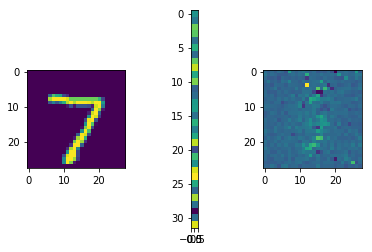

(32,)
(1, 32)


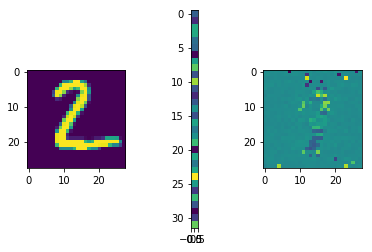

(32,)
(1, 32)


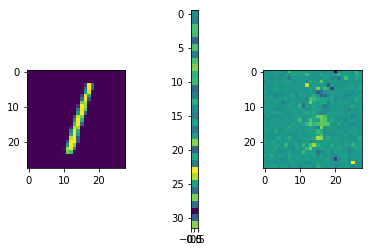

(32,)
(1, 32)


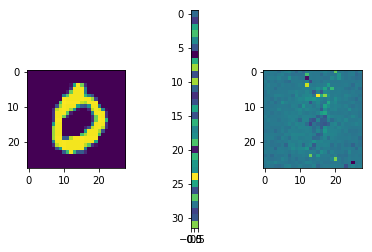

(32,)
(1, 32)


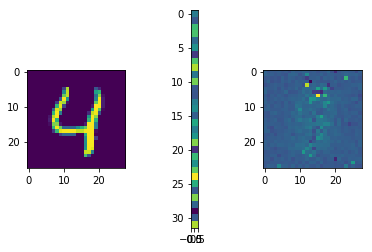

In [83]:
for i in range(5):
    img = X_test[i]
    visualize(img,encoder,decoder)